In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model) 
#* 2*np.pi/position
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

In [3]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)


(1, 16, 16)


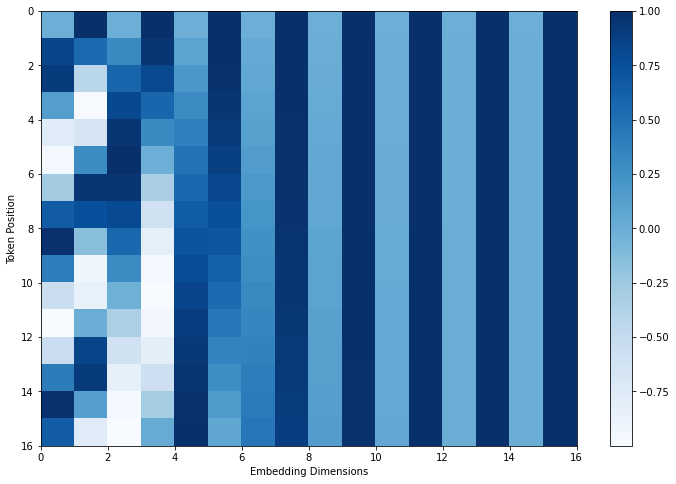

In [118]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='Blues')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()